# Trend Analysis
- Aggregate `total sales`, `profit` monthly by each year
- Aggregate `sales growth rate`
- Plot the monthly total `sales`, `profit`, `sales growth rate` throughout each year
- Explore how Return Rates are trended

### Loading data

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from ContosoRetail_df"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='SalesKey')

# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

### Copying DataFrame

In [2]:
df = df_origin.copy()

df.head()

,SalesKey,DateKey,ChannelName,StoreName,ContinentName,Country,City,ProductName,ProductCategory,PromotionName,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2022-01-02,Store,Contoso Baildon Store,Europe,United Kingdom,Baildon,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,European Holiday Promotion,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
1,2,2022-02-12,Reseller,Contoso North America Reseller,North America,United States,Seattle,Contoso Battery charger - bike E200 Black,Computers,North America Spring Promotion,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
2,3,2023-01-24,Store,Contoso Cambridge Store,Europe,United Kingdom,Cambridge,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,North America Spring Promotion,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
3,4,2023-01-13,Online,Contoso Europe Online Store,Europe,Germany,Berlin,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,European Holiday Promotion,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
4,5,2023-01-22,Online,Contoso Europe Online Store,Europe,Germany,Berlin,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,European Holiday Promotion,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


### Sales and Profit Comparison by Year

In [3]:
import matplotlib.ticker

# Create a Year column
df['Year'] = df['DateKey'].dt.year
df['Year'] = df['Year'].astype(str)

# Create a profit column
df['Profit'] = df['SalesAmount'] - df['TotalCost']

# Aggregate total sales by each Year
df_plot = df.groupby('Year').agg({
    'SalesAmount': 'sum',
    'Profit': 'sum'
})


# Plotting
fig, ax = plt.subplots(1,2, figsize=(9,5))

sns.set_theme(style='ticks')

sns.barplot(
    data=df_plot,
    x='Year',
    y='SalesAmount',
    ax=ax[0],
    legend=False,
    width=0.5,
    color='skyblue'
)

sns.barplot(
    data=df_plot,
    x='Year',
    y='Profit',
    ax=ax[1],
    legend=False,
    width=0.5,
    color='skyblue'
)

# Formatting the graph
fig.tight_layout(w_pad=3)
sns.despine()

fig.suptitle('Sales Amount and Profit Analysis by Year', fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.9)

ax[0].set_xlabel('')
ax[0].set_ylabel('Sales Amount', fontweight='bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000):,}M'))
ax[0].set_ylim(0,5000000000)

ax[1].set_xlabel('')
ax[1].set_ylabel('Profit', fontweight='bold')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000):,}M'))
ax[1].set_ylim(0,5000000000)

# Add labels to the bars 
for container in ax[0].containers: 
    ax[0].bar_label(container, labels=[f'{int(x/1000000):,}M' for x in container.datavalues], padding=3, fontsize=10) 

for container in ax[1].containers: 
    ax[1].bar_label(container, labels=[f'{int(x/1000000):,}M' for x in container.datavalues], padding=3, fontsize=10)

# Showing the plot
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

### Montly Sales and Profit trending over Years

C:\Users\duyvn\AppData\Local\Temp\ipykernel_5528\1330572809.py:26: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\duyvn\AppData\Local\Temp\ipykernel_5528\1330572809.py:35: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


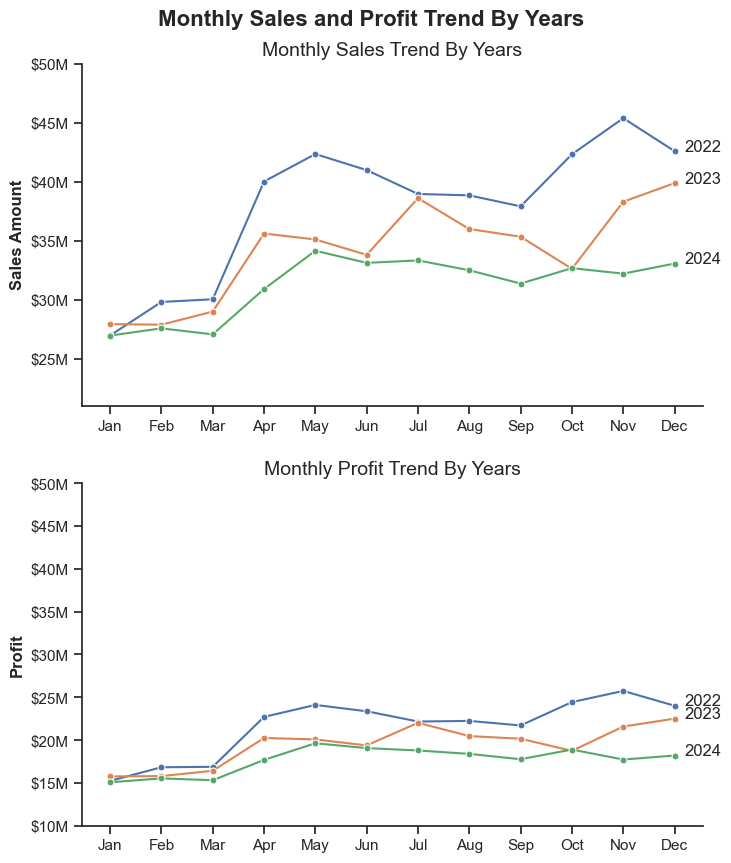

In [46]:
# import matplotlib.ticker

# Create a month column
df['Month'] = df['DateKey'].dt.month

# Aggregate Sales
df_pivot_sales = df[['Year','Month','SalesAmount']]
df_pivot_sales = df_pivot_sales.pivot_table(index='Month', columns='Year', values='SalesAmount', aggfunc='sum')

# Aggregate Profit
df_profit = df[['Year','Month','Profit']]
df_pivot_profit = df_profit.pivot_table(index='Month', columns='Year', values='Profit', aggfunc='sum')

# Convert month nums to month name
df_pivot_sales = df_pivot_sales.reset_index()
df_pivot_sales['Month'] = df_pivot_sales['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot_sales = df_pivot_sales.set_index('Month')

df_pivot_profit = df_pivot_profit.reset_index()
df_pivot_profit['Month'] = df_pivot_profit['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot_profit = df_pivot_profit.set_index('Month')

# Plotting
fig, ax = plt.subplots(2,1, figsize=(7,9))

sns.lineplot(
    data=df_pivot_sales,
    ax=ax[0],
    legend=False,
    dashes=False,
    markers='o',
    markersize=5
)

sns.lineplot(
    data=df_pivot_profit,
    ax=ax[1],
    legend=False,
    dashes=False,
    markers='o',
    markersize=5
)

# Styling plot
sns.set_theme('notebook', style='ticks')
sns.despine()
fig.tight_layout()
fig.suptitle('Monthly Sales and Profit Trend By Years', fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.92)

# Formatting plot
ax[0].set_title('Monthly Sales Trend By Years', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel('Sales Amount', fontweight='bold')
ax[0].set_ylim(210000000,500000000)
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/10000000)}M"))

ax[1].set_title('Monthly Profit Trend By Years', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('Profit', fontweight='bold')
ax[1].set_ylim(100000000,500000000)
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/10000000)}M"))

# Labeling
for i in range(3):
    ax[0].text(11.2, y=df_pivot_sales.iloc[-1,i], s=df_pivot_sales.columns[i])
    ax[1].text(11.2, y=df_pivot_profit.iloc[-1,i], s=df_pivot_profit.columns[i])

### COGs Trend

C:\Users\duyvn\AppData\Local\Temp\ipykernel_5528\1914409622.py:17: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


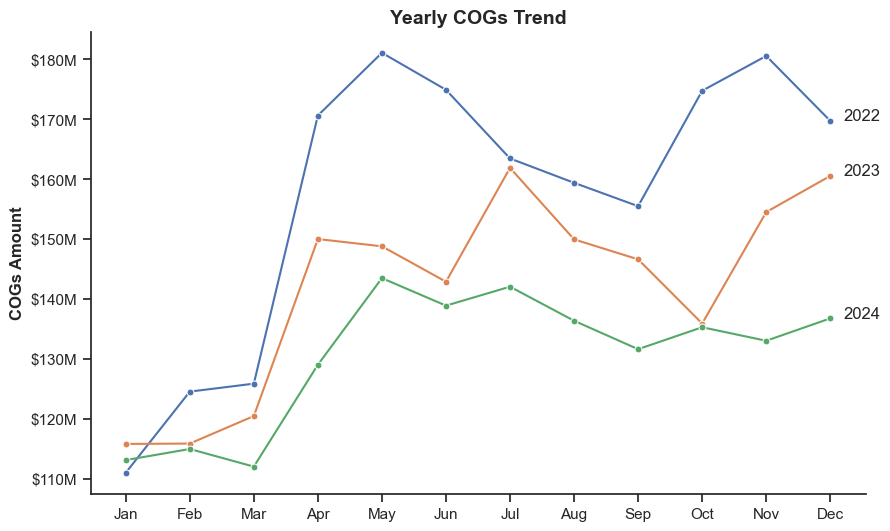

In [47]:
# import matplotlib.ticker

# Calculate COGs
df['COGs'] = df['TotalCost'] - df['DiscountAmount']

# Calculate Yearly COGs Trend
df_cogs_pivot = df.pivot_table(index='Month', columns='Year', values='COGs', aggfunc='sum')

# Convert month num to month name
df_cogs_pivot = df_cogs_pivot.reset_index()
df_cogs_pivot['Month'] = df_cogs_pivot['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_cogs_pivot = df_cogs_pivot.set_index('Month')

# Plotting
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')
sns.lineplot(
    data=df_cogs_pivot,
    dashes=False,
    legend=False,
    markers='o',
    markersize=5
)
sns.despine()

# Styling, formatting plot
plt.title('Yearly COGs Trend', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('COGs Amount', fontweight='bold')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))

# Labeling
for i in range(3):
    plt.gca().text(11.2, y=df_cogs_pivot.iloc[-1,i], s=df_cogs_pivot.columns[i])

plt.show()

### Return rates trend

#### Yearly Return Rates

In [48]:
# Filtering data
df_return = df_origin[['DateKey','SalesQuantity','ReturnQuantity']].copy()

# Create Year and Month columns
df_return['Year'] = df_return['DateKey'].dt.year
df_return['Month'] = df_return['DateKey'].dt.month

# Calculate return rates by Year
df_return_year = df_return.groupby('Year')[['SalesQuantity','ReturnQuantity']].sum().reset_index()
df_return_year['ReturnRates'] = (df_return_year['ReturnQuantity'] / df_return_year['SalesQuantity'])*100
df_return_year = df_return_year.sort_values(by='Year')

df_return_year

,Year,SalesQuantity,ReturnQuantity,ReturnRates
0,2022,16984310,212167,1.249194
1,2023,16470505,152244,0.924343
2,2024,19865639,129176,0.650248


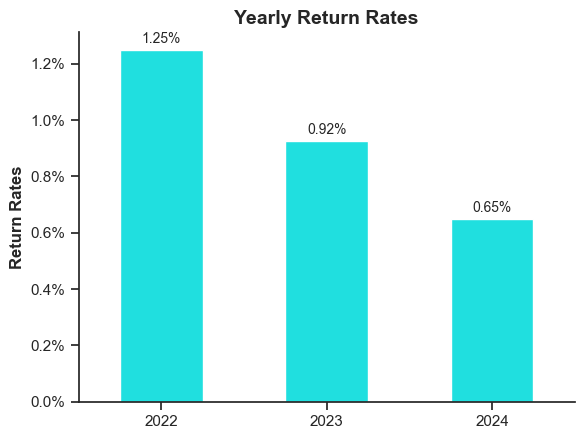

In [49]:
# Plotting return rates
sns.set_theme(style='ticks')
sns.barplot(
    data=df_return_year,
    x='Year',
    y='ReturnRates',
    width=0.5,
    color='cyan'
)
sns.despine()

# Formatting plot
plt.title('Yearly Return Rates', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Return Rates', fontweight='bold')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _:f'{x:.1f}%'))

# Labeling
for i in plt.gca().containers:
    plt.gca().bar_label(i, labels=[f'{x:.2f}%' for x in i.datavalues], padding=3, fontsize=10)

#### Return Rates trend over Years

In [50]:
# Filtering data
df_return_trend = df_origin[['DateKey','SalesQuantity','ReturnQuantity']].copy()

# Create Year and Month columns
df_return_trend['Year'] = df_return_trend['DateKey'].dt.year
df_return_trend['Month'] = df_return_trend['DateKey'].dt.month

# Calculate Return Rates = (Return Quantity / Sales Quantity)*100
df_return_trend = df_return_trend.groupby(['Year','Month'])[['SalesQuantity','ReturnQuantity']].sum().reset_index()
df_return_trend['ReturnRates'] = (df_return_trend['ReturnQuantity'] / df_return_trend['SalesQuantity'])*100
df_return_trend = df_return_trend.pivot_table(index='Month', columns='Year', values='ReturnRates').reset_index()
df_return_trend['Month'] = df_return_trend['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_return_trend = df_return_trend.set_index('Month')

df_return_trend

Year,2022,2023,2024
Month,,,
Jan,1.387373,1.011740,0.677744
Feb,1.336550,1.014973,0.721261
Mar,1.393174,1.030267,0.750554
Apr,1.299277,0.981570,0.695233
May,1.311251,0.916601,0.650054
Jun,1.305446,0.940782,0.647517
Jul,1.126560,0.854158,0.595972
Aug,1.195074,0.895112,0.625542
Sep,1.187481,0.899831,0.637968


C:\Users\duyvn\AppData\Local\Temp\ipykernel_5528\2327237203.py:3: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


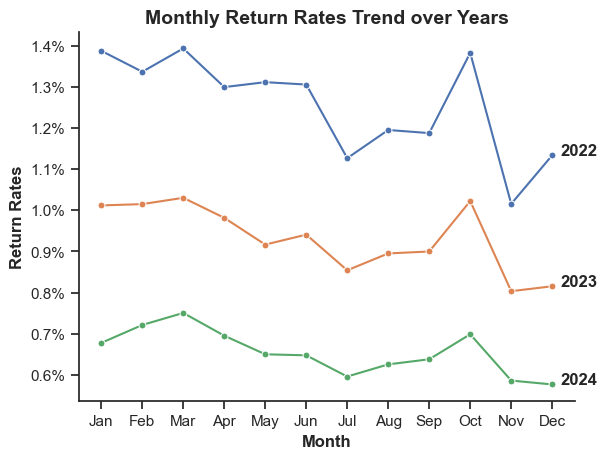

In [51]:
# Plotting return rates trend
sns.set_theme('notebook',style='ticks')
sns.lineplot(
    data=df_return_trend,
    dashes=False,
    legend=False,
    markers='o',
    markersize=5
)
sns.despine()

# Formatting plot
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Return Rates', fontweight='bold')
plt.title('Monthly Return Rates Trend over Years', fontsize=14, fontweight='bold')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Labeling
for i in range(3):
    plt.gca().text(11.2, y=df_return_trend.iloc[-1,i], s=df_return_trend.columns[i], fontweight='bold')

plt.show()